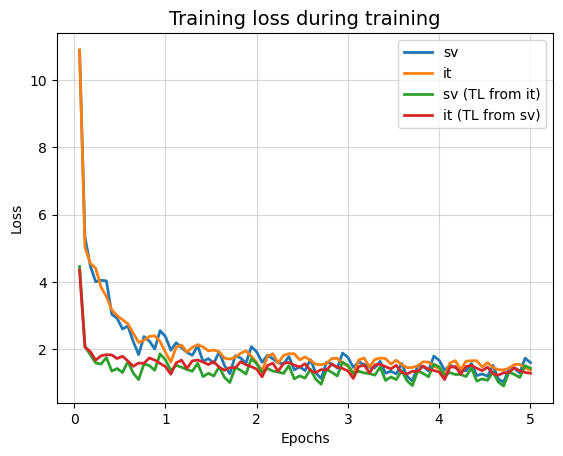

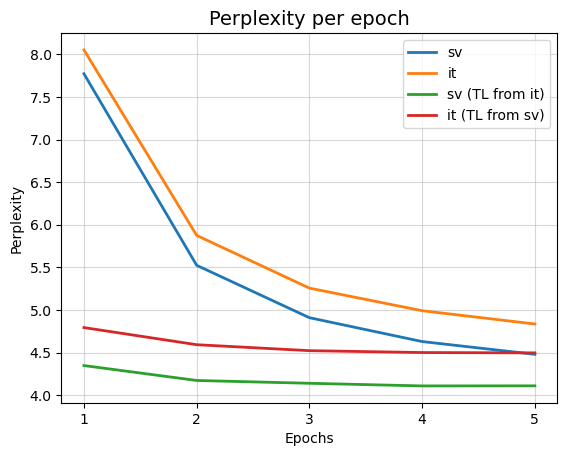

In [40]:
import matplotlib.pyplot as plt
import numpy as np

files = {}
files["sv"] = "runs/training_logs_sv.out"
files["it"] = "runs/training_logs_it.out"
files["sv (TL from it)"] = "runs/training_logs_transfer_learning_it_to_sv.out"
files["it (TL from sv)"] = "runs/training_logs_transfer_learning_sv_to_it.out"

nr_epochs = 5

#plt.figure(figsize=(10, 6))

perplexity_dict = {}
val_loss_dict = {}

for model in files.keys():
    file_name = files[model]
    train_losses = []
    val_losses = []
    perplexities = []

    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith("At epoch"): # training
                loss_str = line.strip().split(" = ")[1]
                loss = float(loss_str)
                train_losses.append(loss)

            if line.startswith("Perplexity for the epoch is"): # validation
                line_parts = line.strip().split(" ")
                perplexity = float(line_parts[5])
                loss = float(line_parts[-1])
                perplexities.append(perplexity)
                val_losses.append(loss)

    perplexity_dict[model] = perplexities
    val_loss_dict[model] = val_losses

    nr_datapoints = len(train_losses)
    nr_datapoints_per_epoch = nr_datapoints

    x = np.linspace(0, nr_epochs, nr_datapoints+1)[1:] # The model is not evaluate before any training has occurred

    plt.plot(x, train_losses, label=model, linewidth=2)

plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.title('Training loss during training', fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



#plt.figure(figsize=(6, 6))
epochs = np.linspace(1, nr_epochs, nr_epochs)
for model in files.keys():
    plt.plot(epochs, perplexity_dict[model], label=model, linewidth=2)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.title('Perplexity per epoch', fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Perplexity")
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5'])
plt.show()